<h2 style="color: #000080; font-weight: bold;">IMPORT LIBRARIES</h2>

In [2]:
import pandas as pd
import plotly.graph_objects as go

# Defining seed and the template for plots
seed = 42
plotly_template = 'simple_white'

def describe(df):
    '''
    This function plots a table containing Descriptive Statistics of the Dataframe
    '''
    mean_features = df.mean().round(2).apply(lambda x: "{:,.2f}".format(x) if isinstance(x, (int, float)) else str(x))
    std_features = df.std().round(2).apply(lambda x: "{:,.2f}".format(x) if isinstance(x, (int, float)) else str(x))
    q1 = df.quantile(0.25).round(2).apply(lambda x: "{:,.2f}".format(x) if isinstance(x, (int, float)) else str(x))
    median = df.quantile(0.5).round(2).apply(lambda x: "{:,.2f}".format(x) if isinstance(x, (int, float)) else str(x))
    q3 = df.quantile(0.75).round(2).apply(lambda x: "{:,.2f}".format(x) if isinstance(x, (int, float)) else str(x))

    # Generating new Dataframe
    describe_df = pd.DataFrame({'Feature Name': mean_features.index,
                                'Mean': mean_features.values,
                                'Standard Deviation': std_features.values,
                                '25%': q1.values,
                                'Median': median.values,
                                '75%': q3.values})

    # Generating a Table w/ Pyplot
    fig = go.Figure(data = [go.Table(header=dict(values=list(describe_df.columns),
                                                 align = 'center',
                                                 fill_color = 'midnightblue',
                                               font=dict(color = 'white', size = 18)),
                                     cells=dict(values=[describe_df['Feature Name'],
                                                        describe_df['Mean'],
                                                        describe_df['Standard Deviation'],
                                                       describe_df['25%'],
                                                       describe_df['Median'],
                                                       describe_df['75%']],
                                                fill_color = 'gainsboro',
                                                align = 'center'))
                           ])

    fig.update_layout(title = {'text': f'<b>Descriptive Statistics of the Dataframe<br><sup> (Mean, Standard Deviation, 25%, Median, and 75%)</sup></b>'},
                      template = plotly_template,
                      height = 700, width = 950,
                      margin = dict(t = 100))

    fig.show()


In [3]:
def plot_correlation(df):
    '''
    This function is resposible to plot a correlation map among features in the dataset
    '''
    corr = np.round(df.corr(), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])
    
    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = 'bluyl')

    fig.update_layout(title = {'text': '<b>Feature Correlation <br> <sup>Heatmap</sup></b>'},
                      height = 650, width = 650,
                      margin = dict(t=210, l = 80),
                      template = 'simple_white',
                      yaxis = dict(autorange = 'reversed'))

    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = 'bluyl',
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    fig.show()

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [5]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

<h2 style="color: #000080; font-weight: bold;">LOAD THE DATASET</h2>

In [6]:
data=pd.read_csv("/kaggle/input/playground-series-s3e22/train.csv")
data.head(4)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.10,132.00,24.00,cool,reduced,dark_cyanotic,...,57.00,8.50,serosanguious,3.40,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.50,88.00,12.00,cool,normal,pale_cyanotic,...,33.00,64.00,serosanguious,2.00,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.30,120.00,28.00,cool,reduced,pale_pink,...,37.00,6.40,serosanguious,3.40,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.10,72.00,30.00,cold,reduced,pale_pink,...,53.00,7.00,cloudy,3.90,yes,2208,0,0,yes,lived


In [7]:
summary(data).style.background_gradient(cmap='plasma')

data shape: (1235, 29)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
id,int64,0,0.000000,1235,0.000000,1234.000000,617.000000,356.658100,0,1,2
surgery,object,0,0.000000,2,nan,nan,nan,nan,yes,yes,yes
age,object,0,0.000000,2,nan,nan,nan,nan,adult,adult,adult
hospital_number,int64,0,0.000000,255,521399.000000,5305129.000000,954500.401619,1356403.138940,530001,533836,529812
rectal_temp,float64,0,0.000000,43,35.400000,40.800000,38.202186,0.788668,38.100000,37.500000,38.300000
pulse,float64,0,0.000000,50,30.000000,184.000000,79.574089,29.108638,132.000000,88.000000,120.000000
respiratory_rate,float64,0,0.000000,37,8.000000,96.000000,30.054251,16.452066,24.000000,12.000000,28.000000
temp_of_extremities,object,39,3.157895,4,nan,nan,nan,nan,cool,cool,cool
peripheral_pulse,object,60,4.858300,4,nan,nan,nan,nan,reduced,normal,reduced
mucous_membrane,object,21,1.700405,6,nan,nan,nan,nan,dark_cyanotic,pale_cyanotic,pale_pink


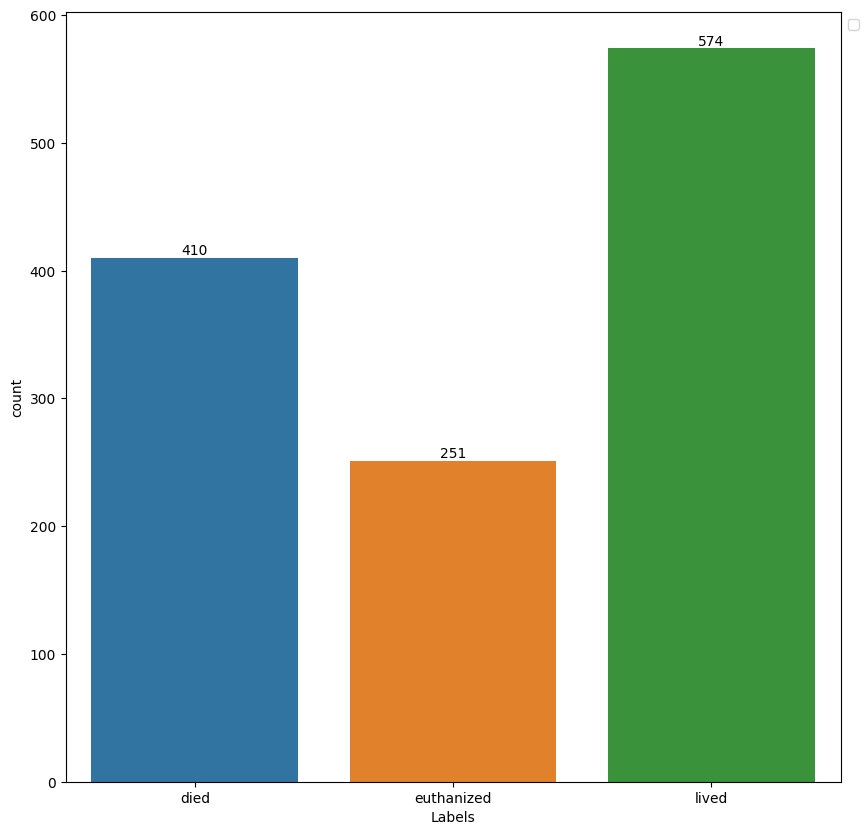

In [8]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=data,x="outcome")

for label in ax.containers:
    ax.bar_label(label)
    
plt.xlabel("Labels")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [9]:
data = data.drop('id', axis = 1)  # Dropping 'Id' columns

In [10]:
#Numeric kolonları belirleme
num_sutun=[sutun for sutun in data.columns if data[sutun].dtype !='object']
num_sutun

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [11]:
data[["hospital_number","pulse"]]

,hospital_number,pulse
0,530001,132.00
1,533836,88.00
2,529812,120.00
3,5262541,72.00
4,5299629,52.00
...,...,...
1230,535246,129.00
1231,528570,60.00
1232,529685,84.00
1233,534784,70.00


In [12]:
describe(data[['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']])

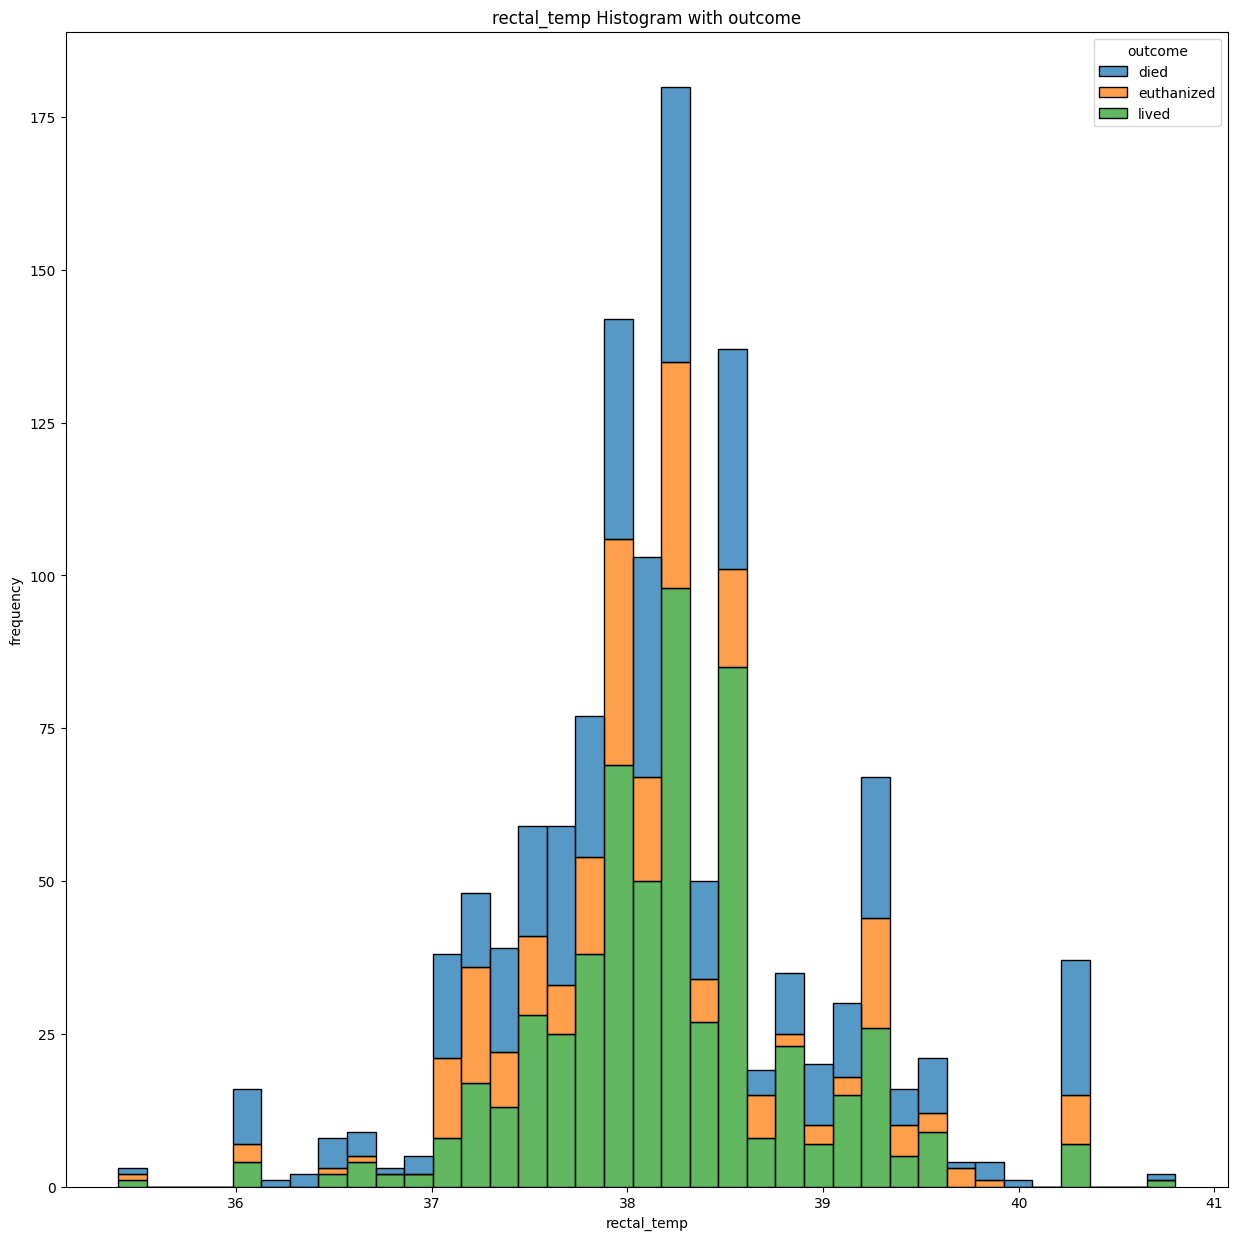

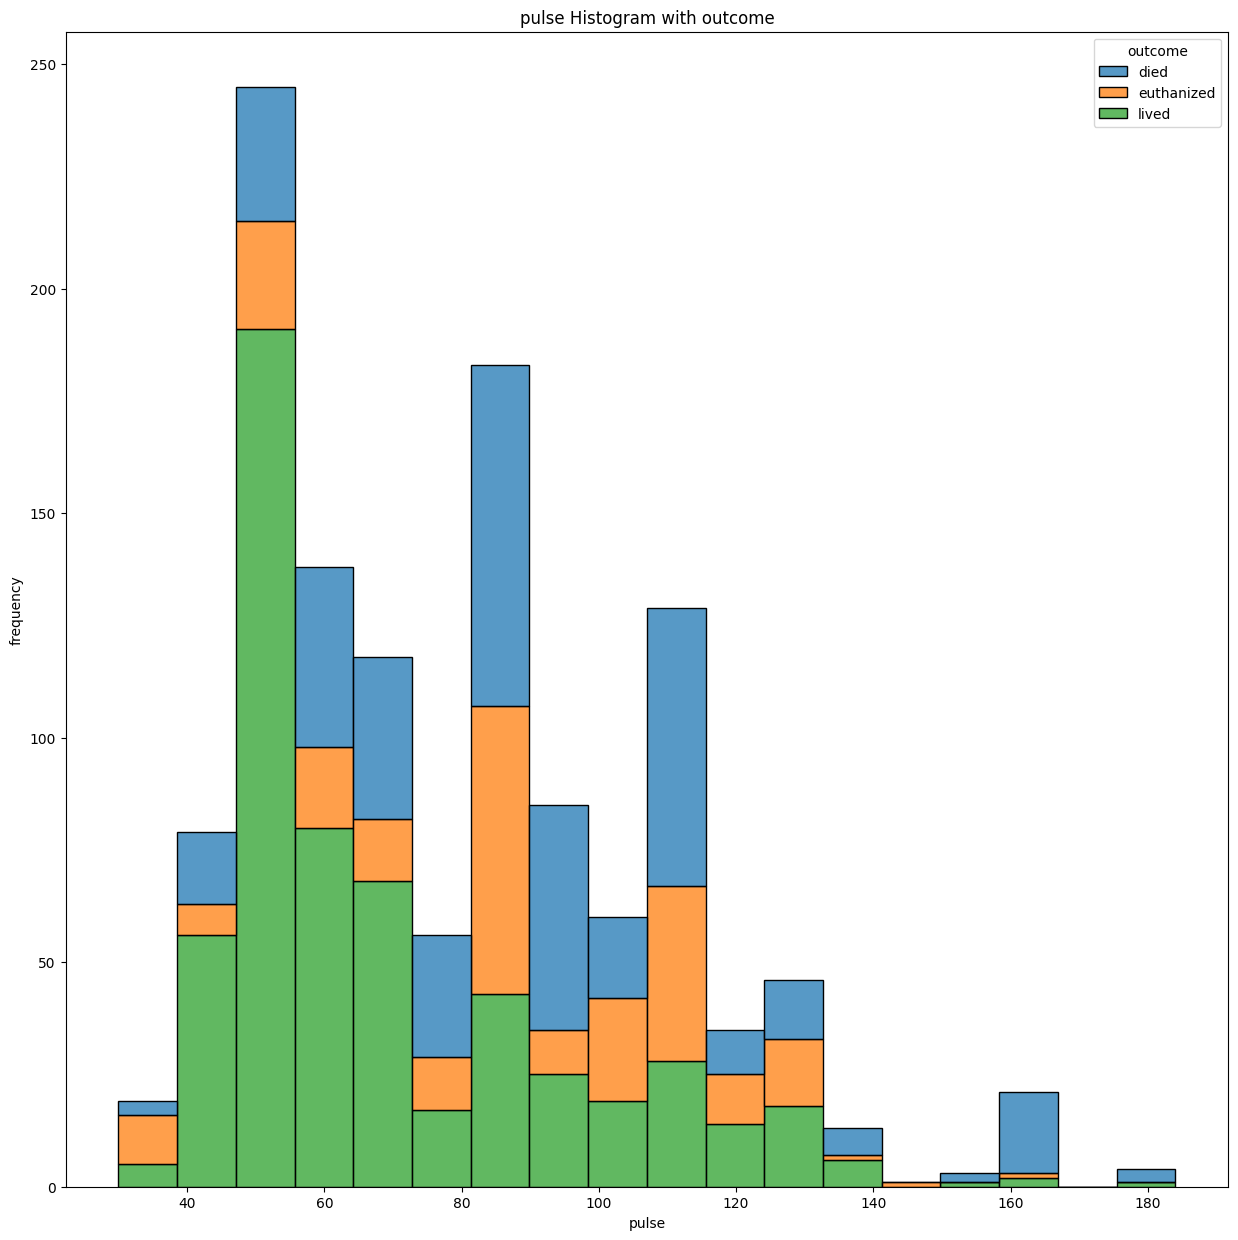

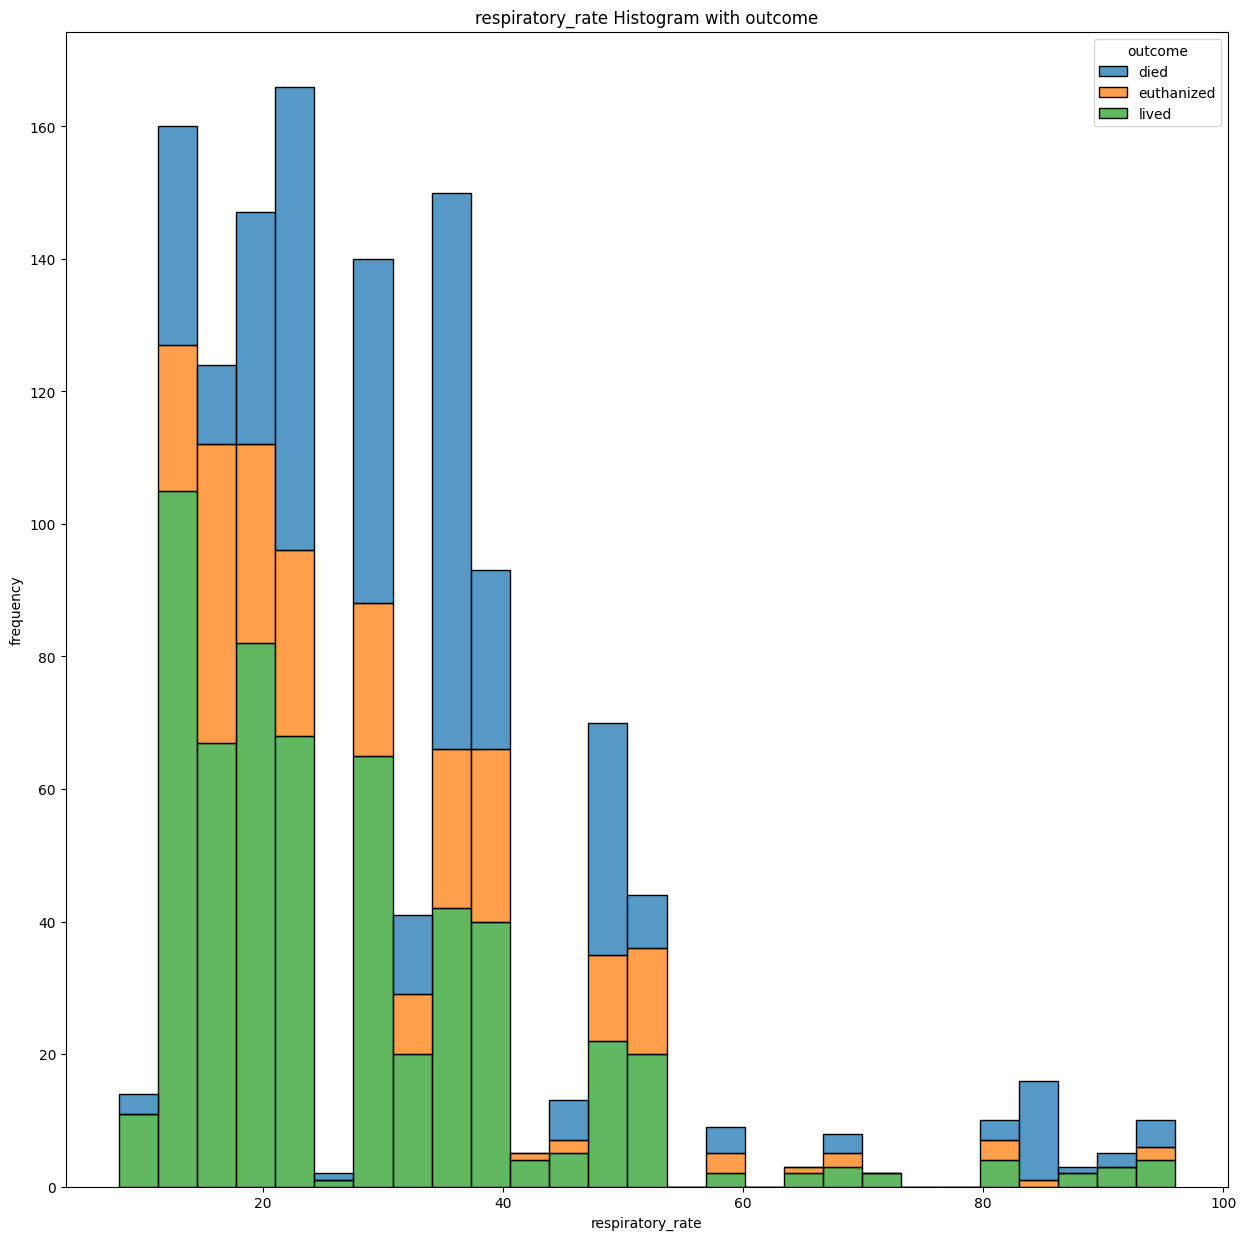

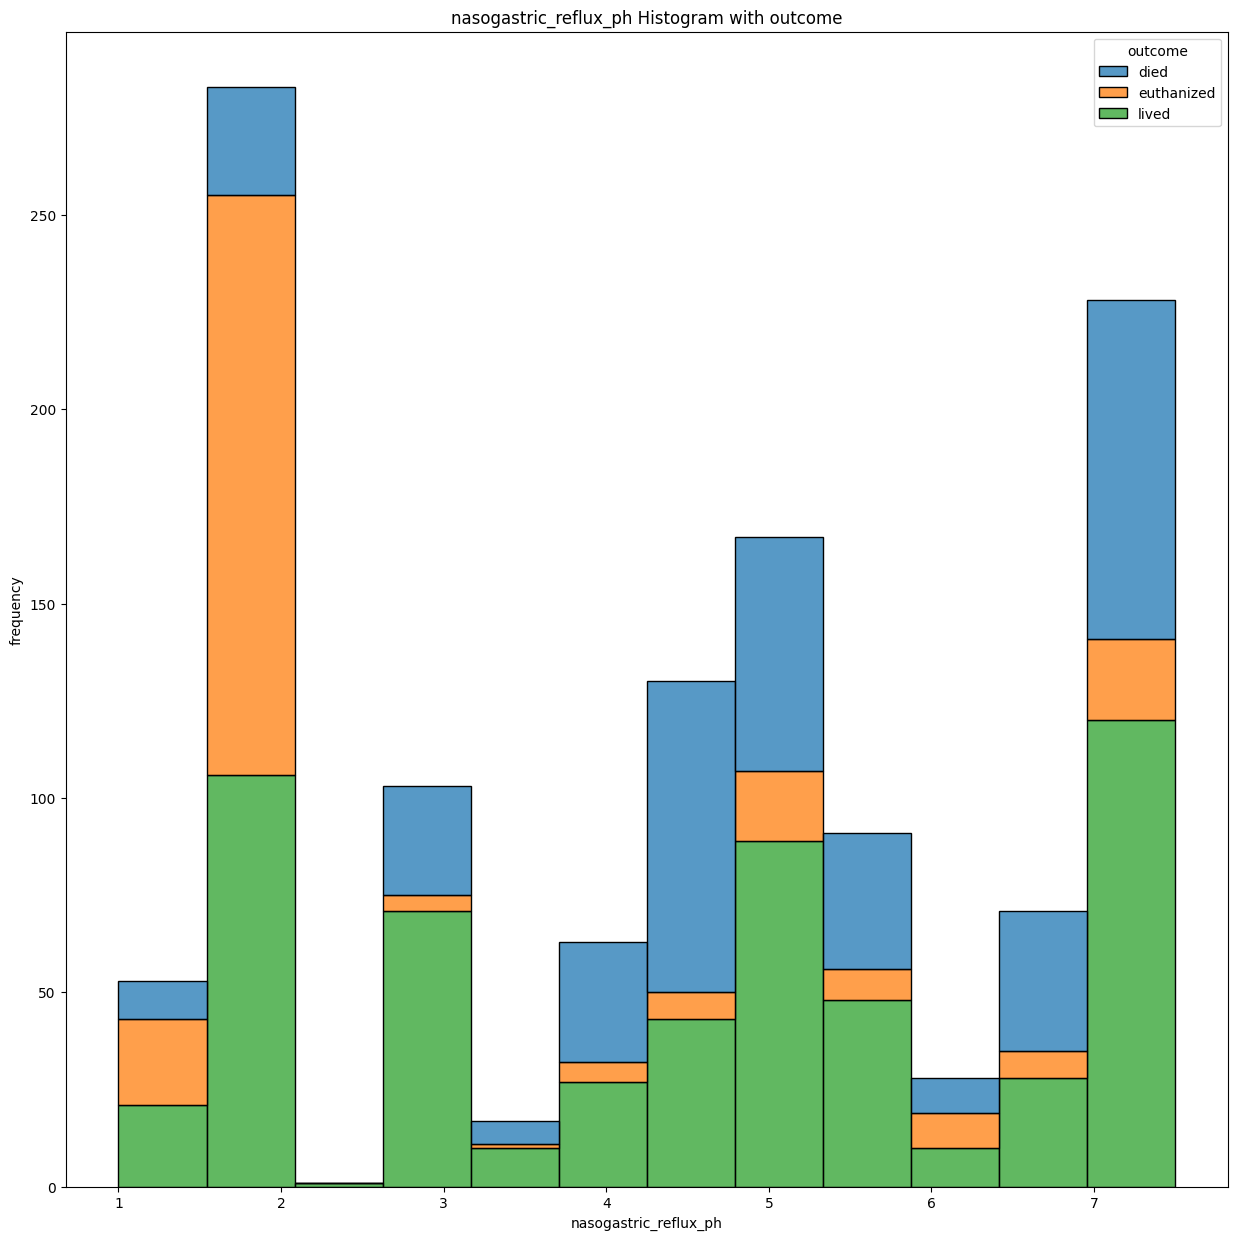

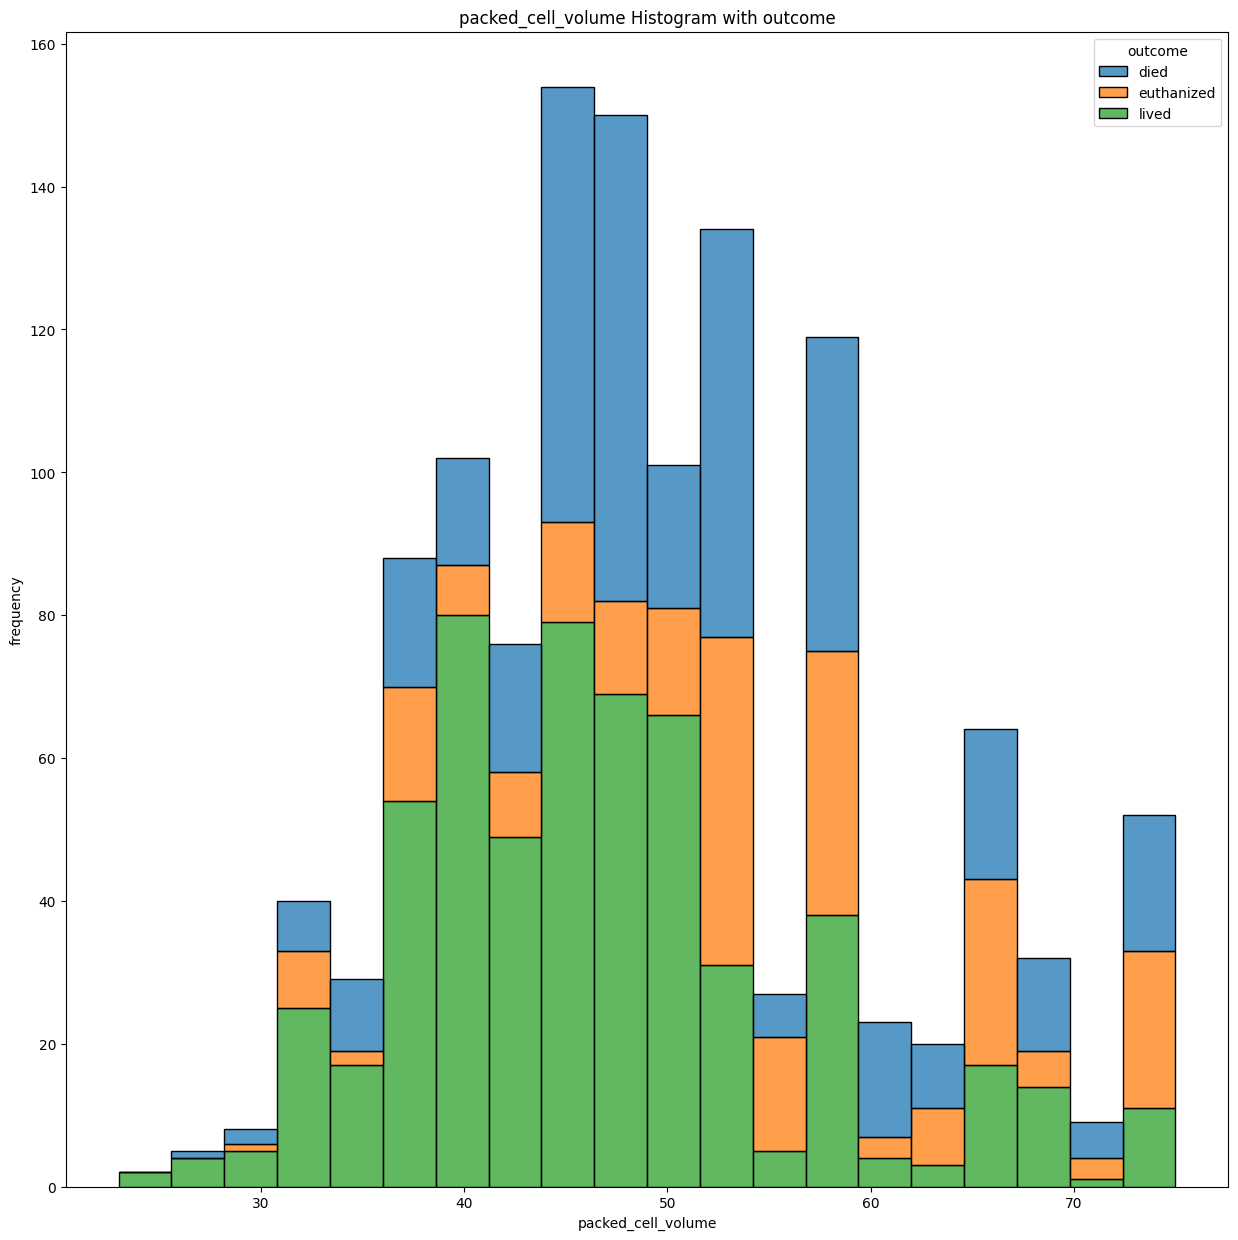

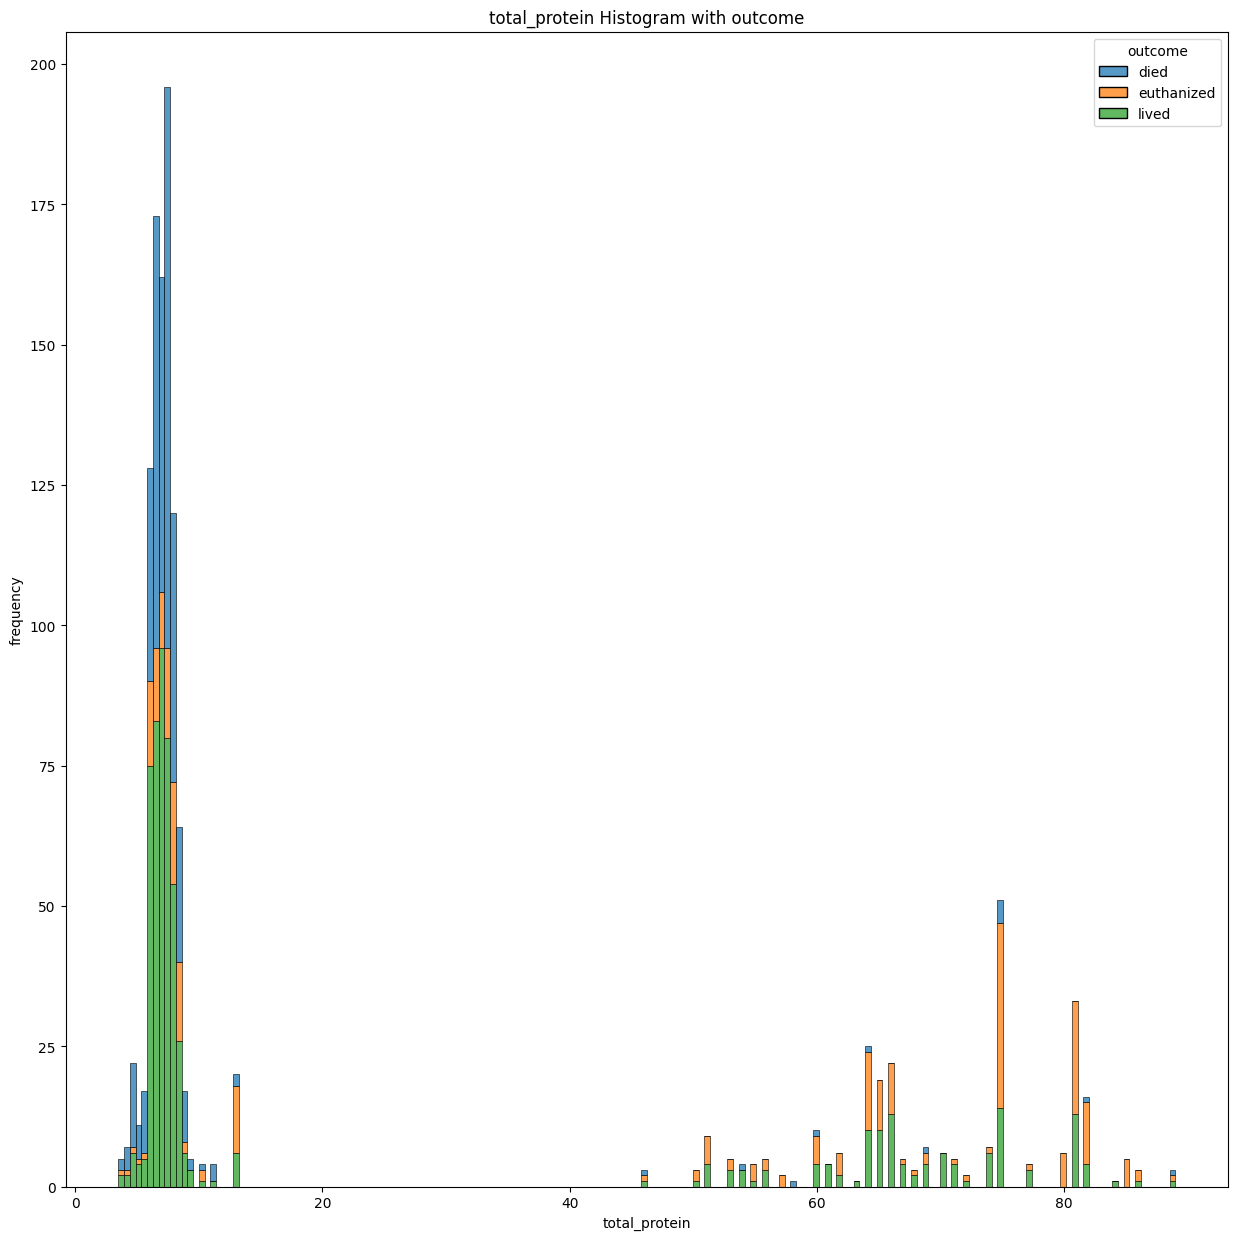

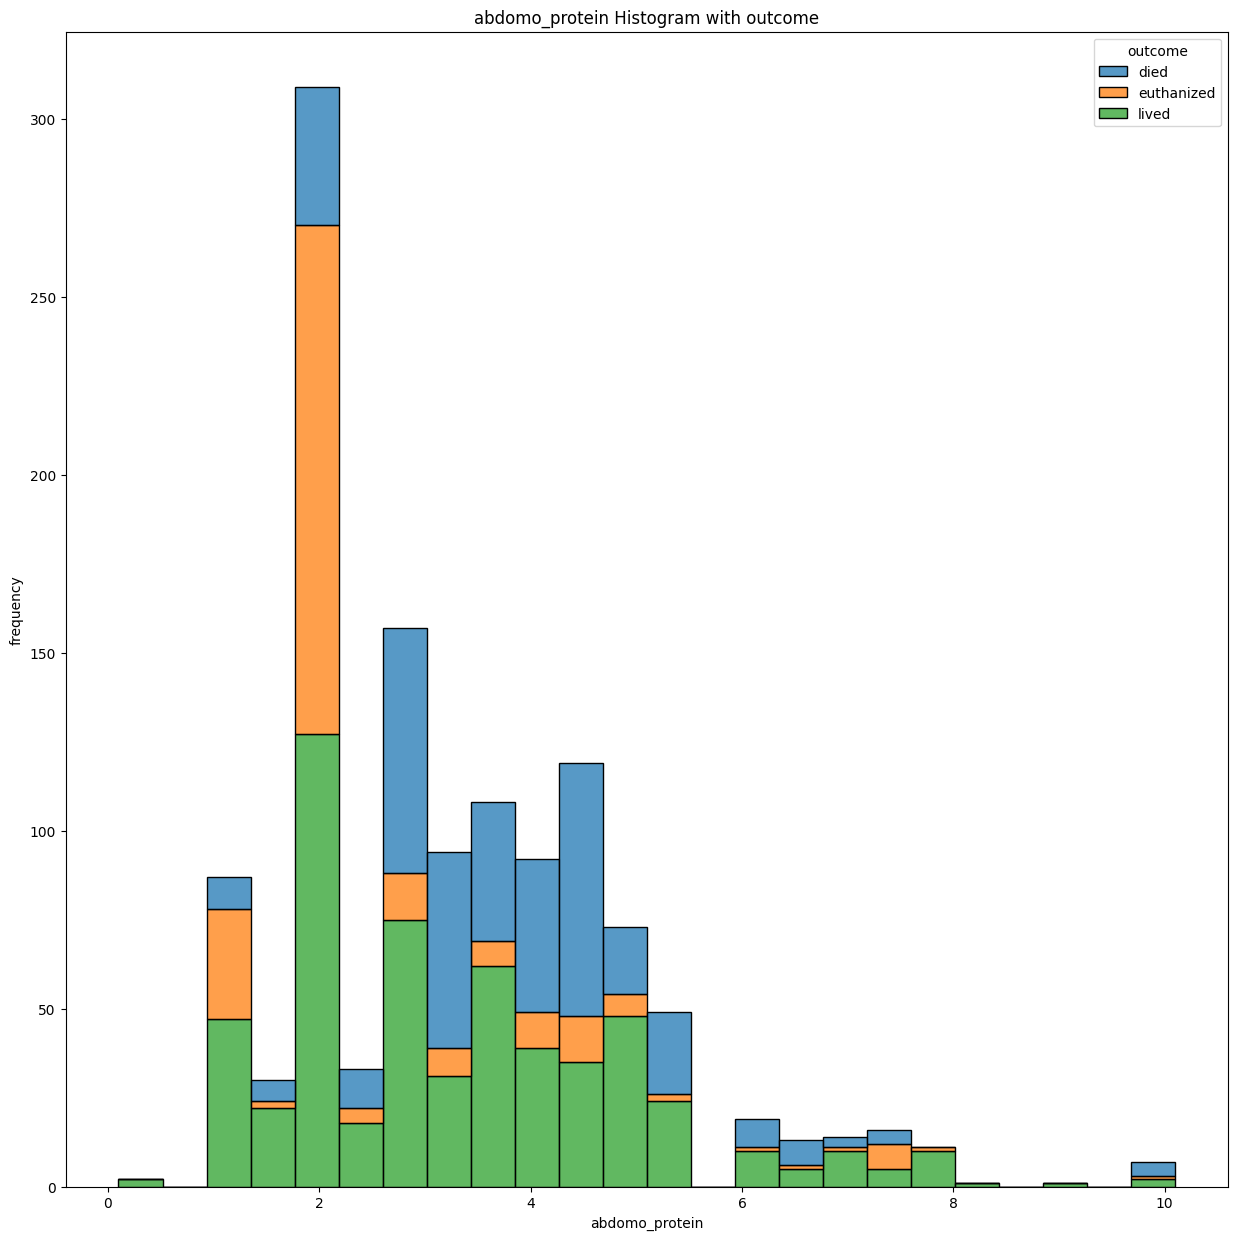

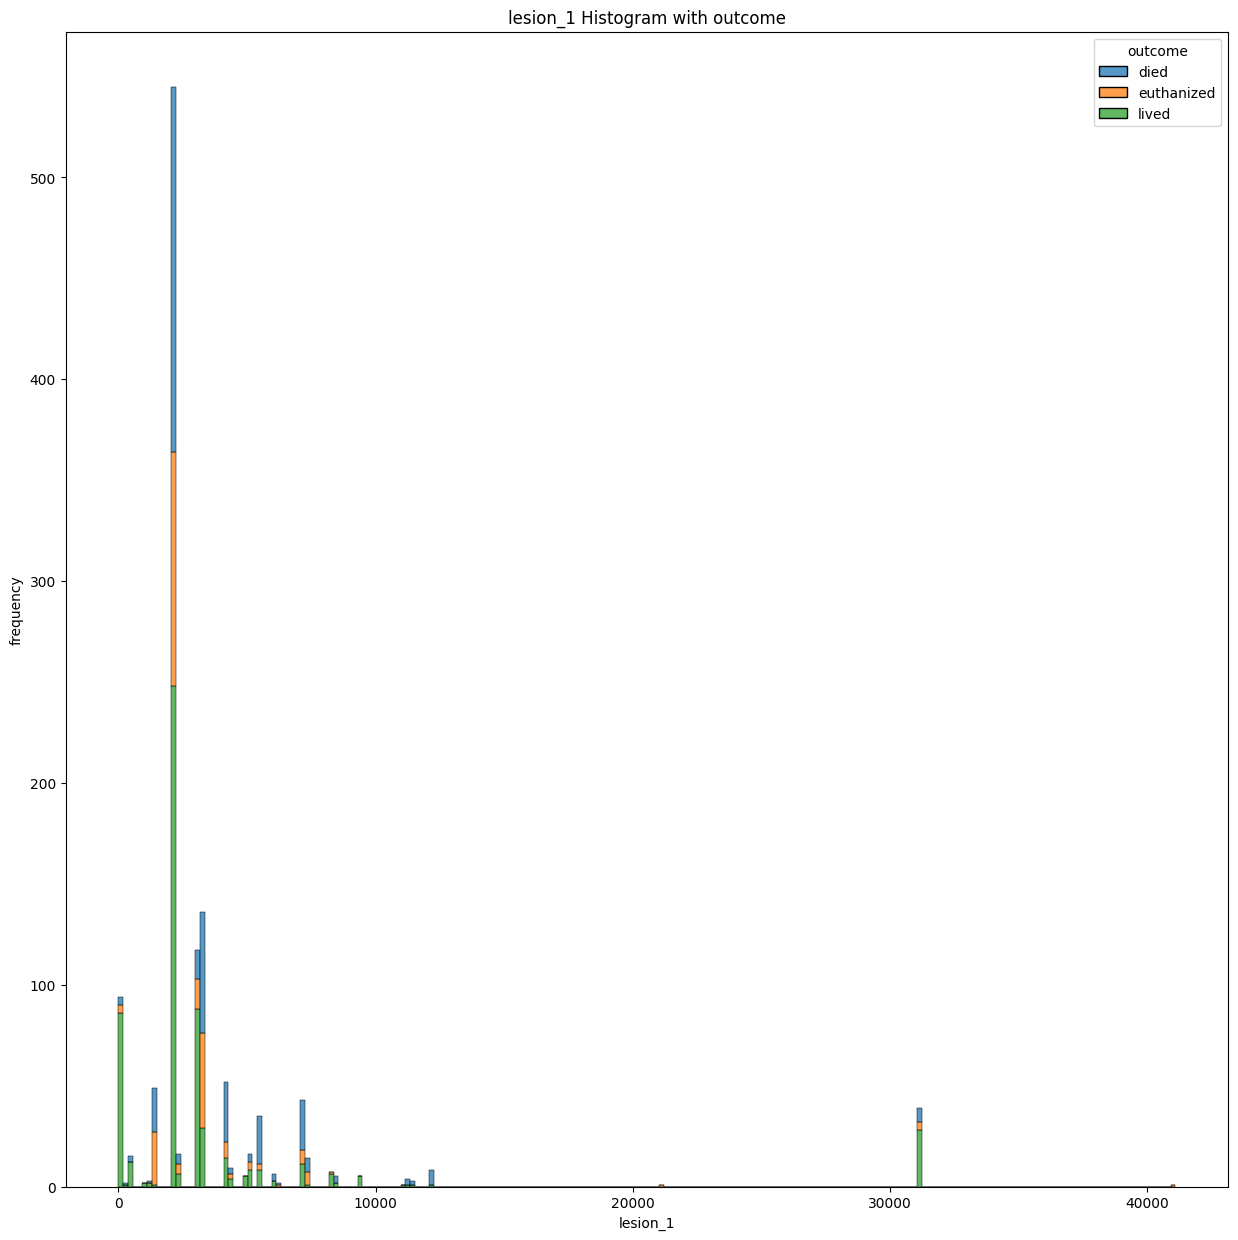

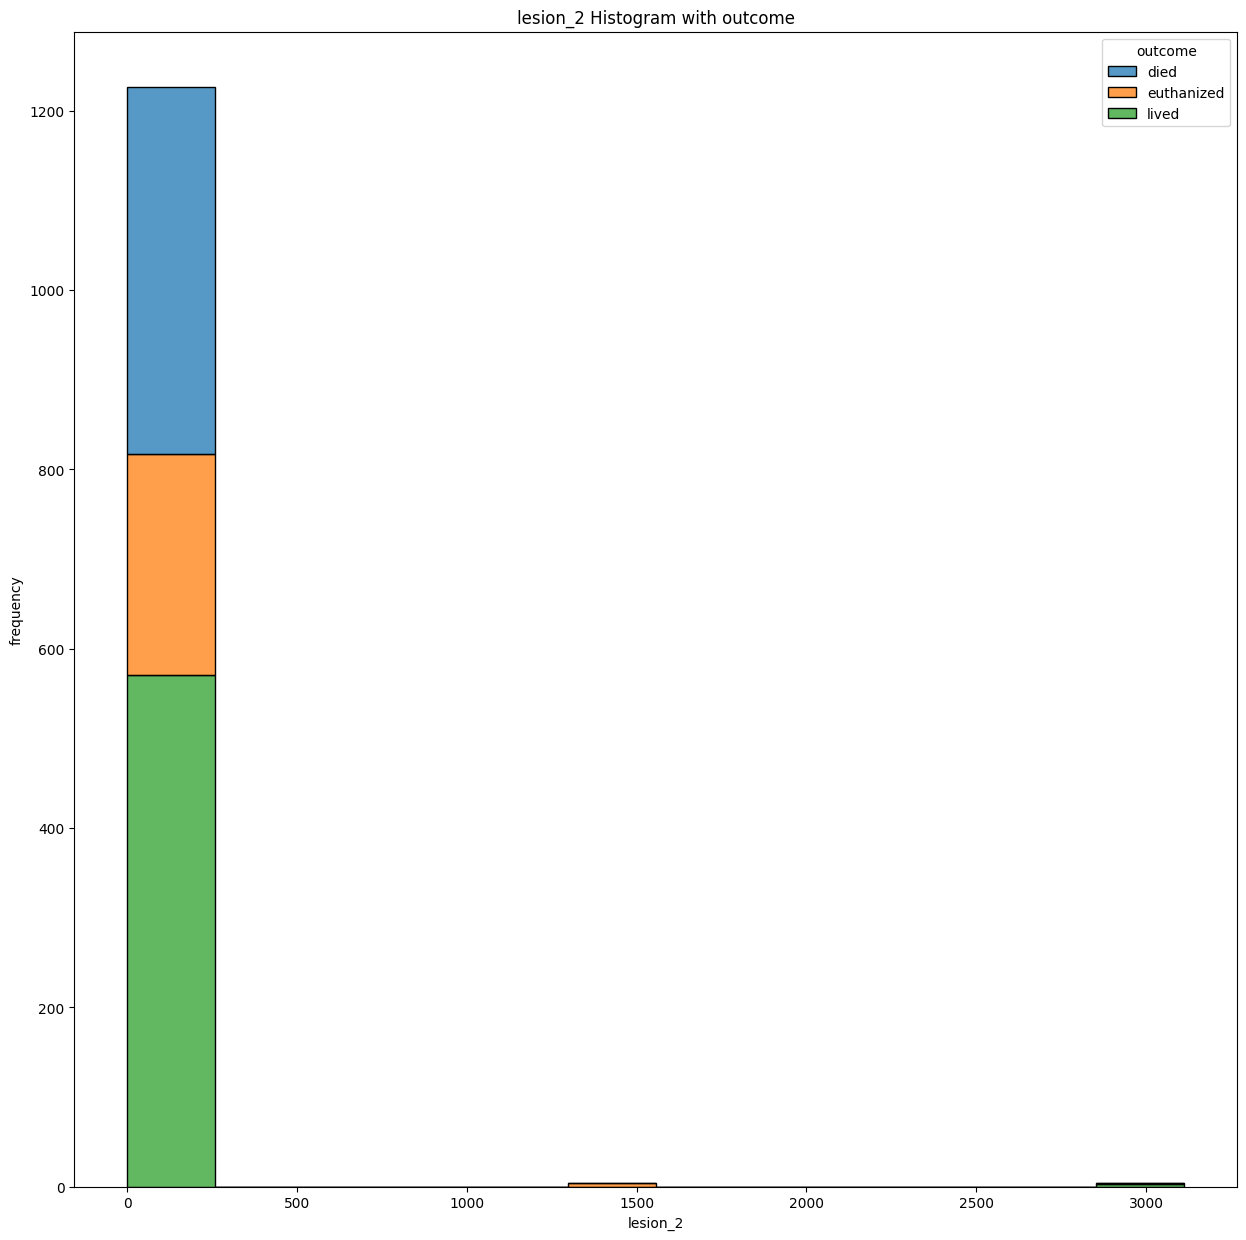

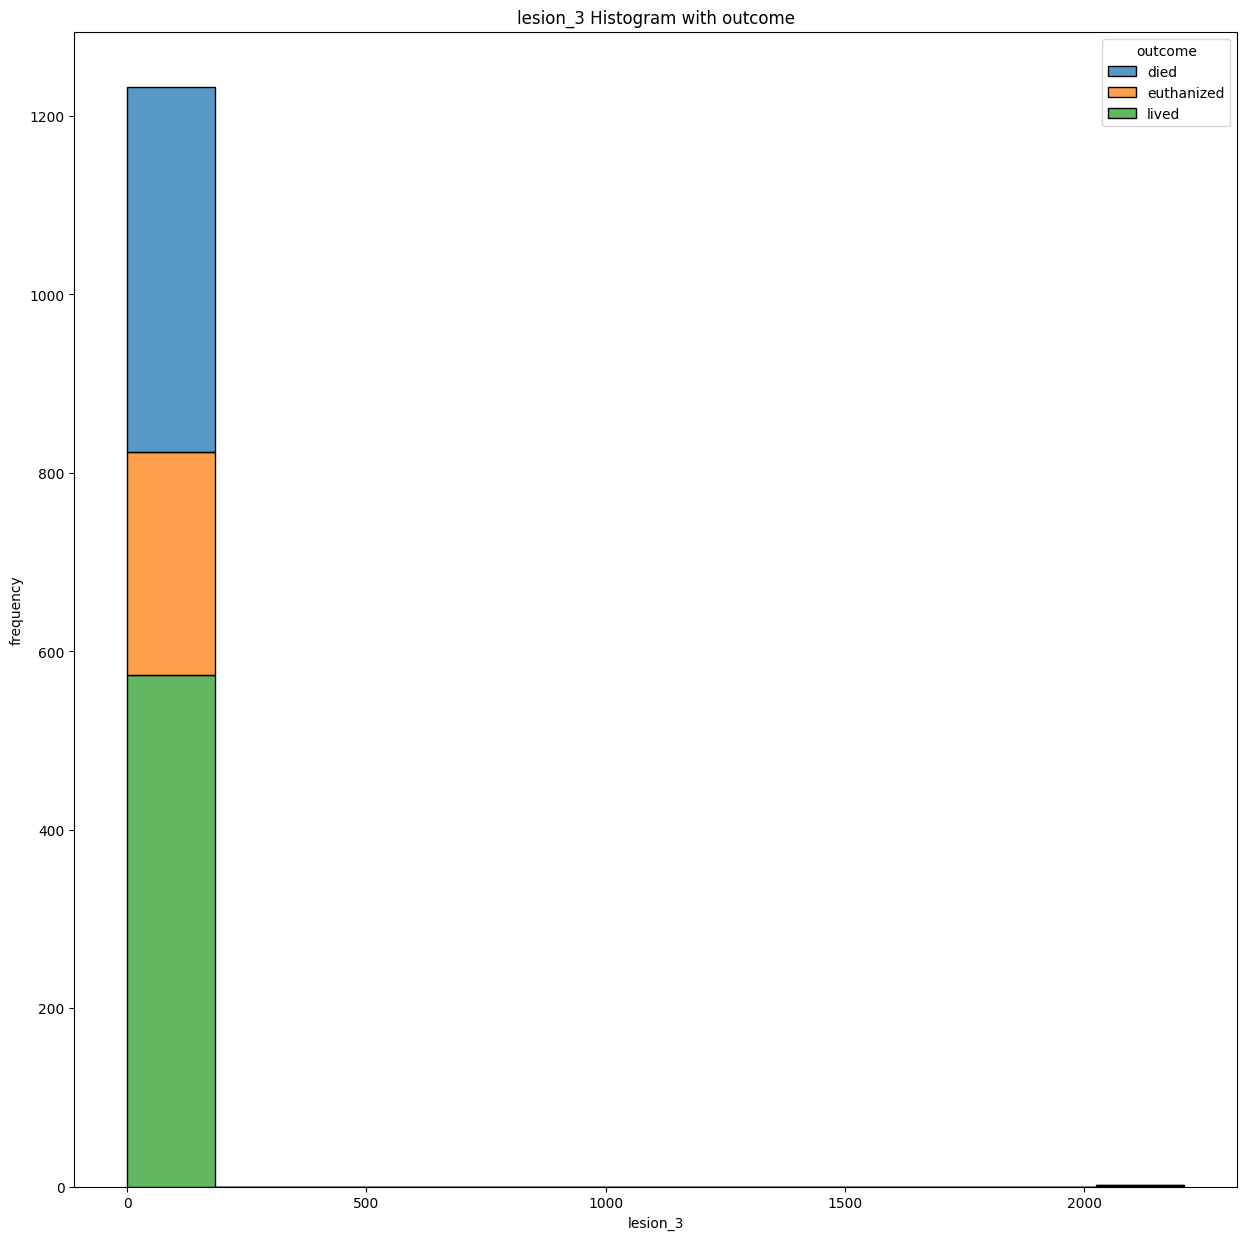

In [13]:
num_rows=[
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

for num_row in num_rows:
    plt.figure(figsize=(15,15))
    sns.histplot(data=data,x=num_row,hue='outcome',multiple="stack",palette="tab10")
    plt.title(f"{num_row} Histogram with outcome")
    plt.xlabel(f"{num_row}")
    plt.ylabel("frequency")
    
    
    
    plt.show()

